In [2]:
# Install missing packages (if any)
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [4]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [27]:
# Basic info
print("Train Dataset Shape:", train_df.shape)
print("Test Dataset Shape:", test_df.shape)
print("\nMissing Values:\n", train_df.isnull().sum())

Train Dataset Shape: (891, 12)
Test Dataset Shape: (418, 11)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Keep PassengerId for submission
test_passenger_ids = test_df['PassengerId']

In [6]:
# Combine datasets for consistent preprocessing
full_data = pd.concat([train_df, test_df], sort=False)

In [7]:
# Fill missing Age with median
age_imputer = SimpleImputer(strategy='median')
full_data['Age'] = age_imputer.fit_transform(full_data[['Age']])

In [8]:
# Fill missing Embarked with mode
full_data['Embarked'] = full_data['Embarked'].fillna(full_data['Embarked'].mode()[0])

In [9]:
# Fill missing Fare in test set with median
full_data['Fare'] = full_data['Fare'].fillna(full_data['Fare'].median())

In [10]:
# Encode categorical features
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
full_data['Sex'] = le_sex.fit_transform(full_data['Sex'])
full_data['Embarked'] = le_embarked.fit_transform(full_data['Embarked'])

In [11]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train = full_data[full_data['Survived'].notnull()]
test = full_data[full_data['Survived'].isnull()]

In [12]:
X = train[features]
y = train['Survived'].astype(int)
X_test = test[features]

In [13]:
# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X, y)
log_preds = log_model.predict(X)
log_f1 = f1_score(y, log_preds)
print(f"Logistic Regression F1-Score: {log_f1:.2f}")

Logistic Regression F1-Score: 0.73


In [14]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_preds = rf_model.predict(X)
rf_f1 = f1_score(y, rf_preds)
print(f"Random Forest F1-Score: {rf_f1:.2f}")

Random Forest F1-Score: 0.97


In [15]:
# Final Predictions using Random Forest
final_preds = rf_model.predict(X_test)

In [19]:
print(final_preds)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 1]


In [20]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

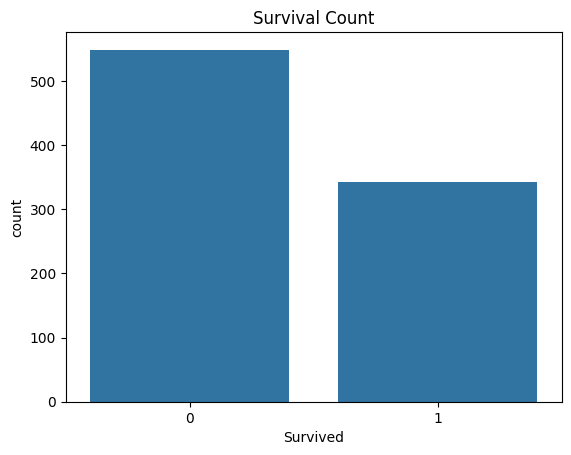

In [23]:
# Survival count
sns.countplot(data=train_df, x='Survived')
plt.title("Survival Count")
plt.show()

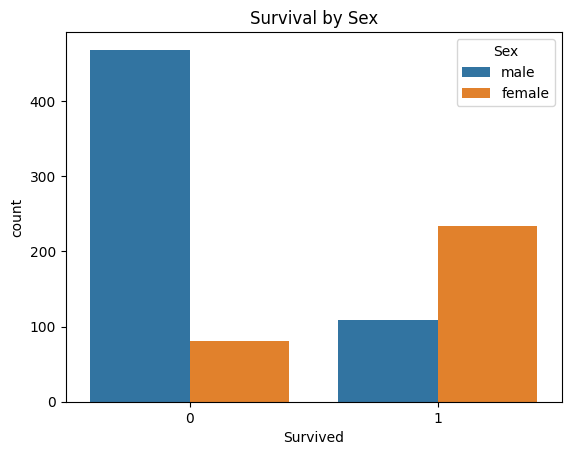

In [24]:
# Survival by Sex
sns.countplot(data=train_df, x='Survived', hue='Sex')
plt.title("Survival by Sex")
plt.show()

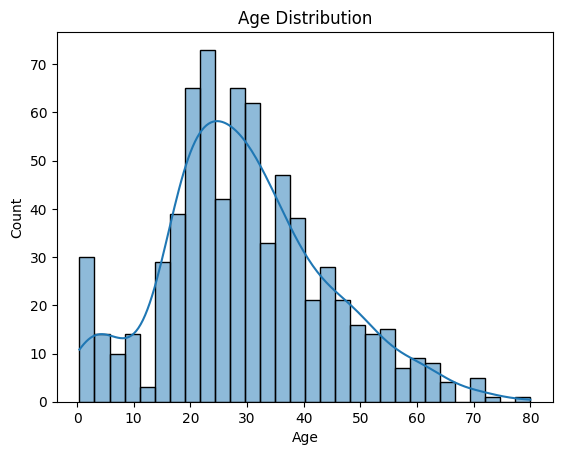

In [25]:
# Age distribution
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

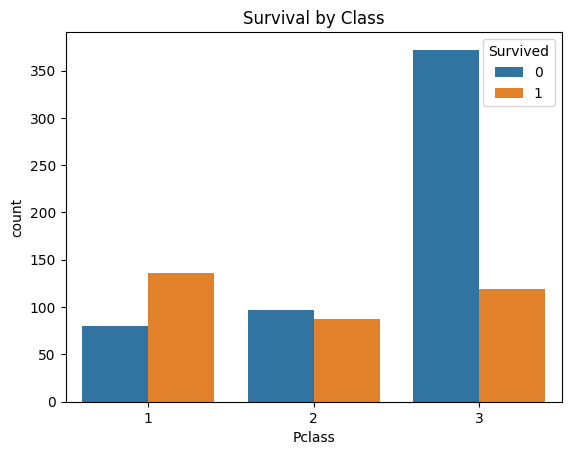

In [26]:
# Survival by Pclass
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Class")
plt.show()

In [16]:
# Create Submission File
submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': final_preds.astype(int)
})